# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

lr 1.000000e-02 reg 1.000000e-02 train accuracy: 0.507327 val accuracy: 0.489000
lr 1.000000e-02 reg 2.575000e-01 train accuracy: 0.494592 val accuracy: 0.482000
lr 1.000000e-02 reg 5.050000e-01 train accuracy: 0.488898 val accuracy: 0.483000
lr 1.000000e-02 reg 7.525000e-01 train accuracy: 0.480551 val accuracy: 0.465000
lr 1.000000e-02 reg 1.000000e+00 train accuracy: 0.477184 val accuracy: 0.462000
lr 2.575000e-01 reg 1.000000e-02 train accuracy: 0.458184 val accuracy: 0.453000
lr 2.575000e-01 reg 2.575000e-01 train accuracy: 0.409694 val accuracy: 0.404000
lr 2.575000e-01 reg 5.050000e-01 train accuracy: 0.355000 val accuracy: 0.361000
lr 2.575000e-01 reg 7.525000e-01 train accuracy: 0.327551 val accuracy: 0.316000
lr 2.575000e-01 reg 1.000000e+00 train accuracy: 0.312122 val accuracy: 0.308000
lr 5.050000e-01 reg 1.000000e-02 train accuracy: 0.437857 val accuracy: 0.424000
lr 5.050000e-01 reg 2.575000e-01 train accuracy: 0.323020 val accuracy: 0.304000
lr 5.050000e-01 reg 5.050000

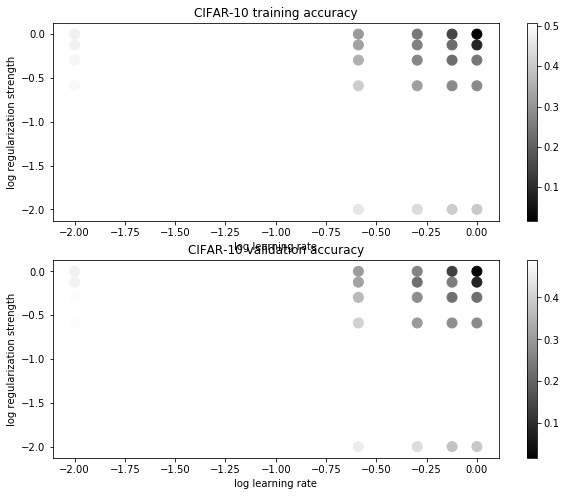

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2, 1e0]
regularization_strengths = [1e-2, 1e0]

results = {}
best_val = -1
best_svm = None

range_lr = np.linspace(learning_rates[0],learning_rates[1],5)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],5)
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

for valid_lr in range_lr:
    for valid_reg in range_reg:
        
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, valid_lr, valid_reg, num_iters=3000)
        
        train_predict = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == train_predict)
        
        val_predict = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == val_predict)
        
        results[(valid_lr,valid_reg)] = (train_accuracy,val_accuracy)

        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.481


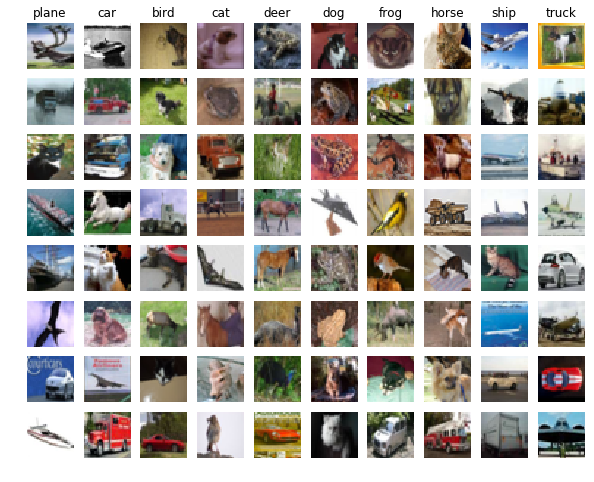

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

The color histogram feature brings a bias towards images with similar backgrounds or foregrounds as the same class, which leads a kind of misclassification. For example, the bird and the hourse in green background are misclassified to frog. Similarly, the HOG feature trends to put images with similar edges into the same category. For example, many cars are misclassified to truck. Hence, the misclassification results make sense.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print(X_train_feats.shape)

(49000, 155)


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
results = {}
best_val_acc = -1
# hidden_size = [75, 150]
learning_rates = [1e-2, 2e0]
regularization_strengths = [1e-3, 2e-2]

range_lr = np.linspace(learning_rates[0],learning_rates[1],5)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],5)
# range_hs = np.linspace(hidden_size[0],hidden_size[1],4, dtype = int)

rate = 0
# for hs in range_hs:
    
for lr in range_lr:
    tic = time.time()
    for reg in range_reg:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=1500, batch_size=400, learning_rate=lr, 
        learning_rate_decay=0.95, reg = reg)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc
    rate += 0.2
    toc = time.time()
    print(rate,"% done", toc-tic, "seconds costed")

for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print( "lr {} reg {} val accuracy:{}".format(lr, reg, val_acc) )
    
print("Best validation accuracy:{}".format(best_val_acc))
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

0.2 % done 38.9417405128479 seconds costed
0.4 % done 39.39509558677673 seconds costed
0.6000000000000001 % done 38.249027967453 seconds costed
0.8 % done 42.047173738479614 seconds costed
1.0 % done 46.713579177856445 seconds costed
lr 0.01 reg 0.001 val accuracy:0.177
lr 0.01 reg 0.00575 val accuracy:0.199
lr 0.01 reg 0.010499999999999999 val accuracy:0.142
lr 0.01 reg 0.01525 val accuracy:0.115
lr 0.01 reg 0.02 val accuracy:0.169
lr 0.5075 reg 0.001 val accuracy:0.581
lr 0.5075 reg 0.00575 val accuracy:0.545
lr 0.5075 reg 0.010499999999999999 val accuracy:0.515
lr 0.5075 reg 0.01525 val accuracy:0.491
lr 0.5075 reg 0.02 val accuracy:0.489
lr 1.005 reg 0.001 val accuracy:0.585
lr 1.005 reg 0.00575 val accuracy:0.548
lr 1.005 reg 0.010499999999999999 val accuracy:0.486
lr 1.005 reg 0.01525 val accuracy:0.489
lr 1.005 reg 0.02 val accuracy:0.489
lr 1.5025 reg 0.001 val accuracy:0.587
lr 1.5025 reg 0.00575 val accuracy:0.541
lr 1.5025 reg 0.010499999999999999 val accuracy:0.504
lr 1.502

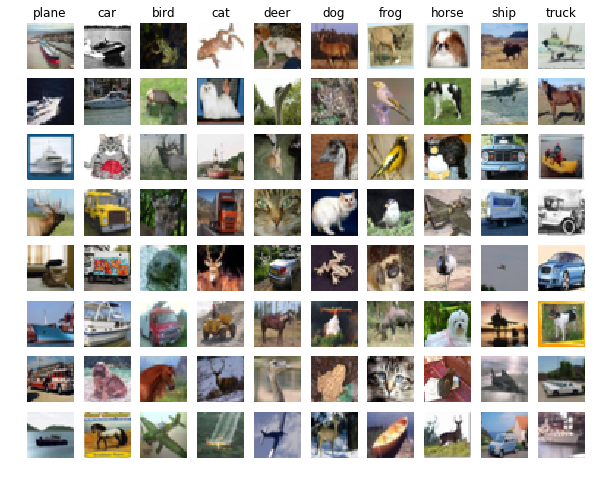

In [9]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

In [10]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.574


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

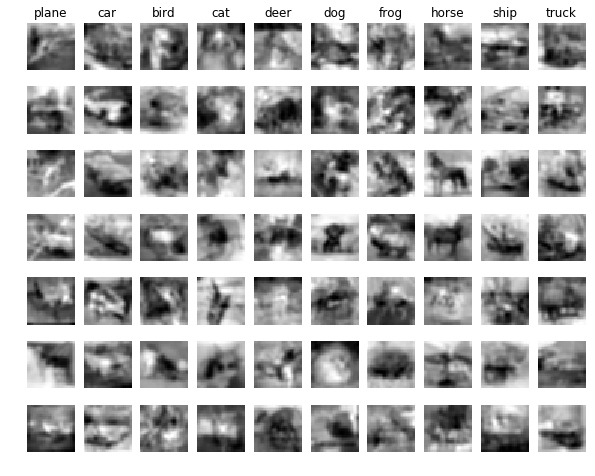

In [11]:
"""
For convenience, I'd like to use the build-in Sobel filter and Gaussian filter 
to help me extracting the edge feature.
"""
from scipy import ndimage
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from cs231n.features import *

cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

def catch_edge(imgs):
    imgs = rgb2gray(imgs)
    imgs = ndimage.gaussian_filter(imgs, 1, mode = "reflect", truncate=3.0)
    fil_img = ndimage.gaussian_filter(imgs, 0.1, mode = "reflect", truncate=3.0)
    shapen = fil_img + 10*np.abs(fil_img - imgs)
    return shapen
    feature_x = ndimage.sobel(imgs, axis=0, mode = "constant")
    feature_y = ndimage.sobel(imgs, axis=1, mode = "constant")
    return np.hypot(feature_x, feature_y)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
X_train = catch_edge(X_train)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

I tried to sharpen the image to get the enhanced vector but don't work well due to the numerical trouble. So I'll present another similar one with fine tuned parameters: use the difference of filtered image (Gaussian) to enhance the dominant information of the image.

In [4]:
def dog_features(im, light=1,heavy=3, order=0):
    """
    I'll use scipy.ndimage.filters.gaussian_filter to diminish the inessential information.
    From the signal processing perspective, the difference of Gaussians is like a band-pass filter to wipe the noise.
    im: image vector.
    light&heavy: Standard deviation for Gaussian kernels
    order: order of derivatives of a Gaussian
    return: DoG feature vector
    """
    from scipy.ndimage.filters import gaussian_filter
    from sklearn.preprocessing import normalize
    import numpy as np
    
    if im.ndim == 3:
        image = rgb2gray(im)
    else:
        image = np.at_least_2d(im)

    image_filtered_light = gaussian_filter(image, sigma=light, order=order, mode='reflect', truncate=3.0)
    image_filtered_heavy = gaussian_filter(image, sigma=heavy, order=order, mode='reflect', truncate=3.0)
    return normalize(np.abs(image_filtered_light - image_filtered_heavy),axis=0).ravel()

In [5]:
def edge_features(im, axis=-1):
    """
    sobel filter to enhance the edge feature
    """
    from scipy.ndimage.filters import sobel
    if im.ndim == 3:
        image = rgb2gray(im)
    else:
        image = np.at_least_2d(im)
        
    return sobel(image, axis=axis).ravel()

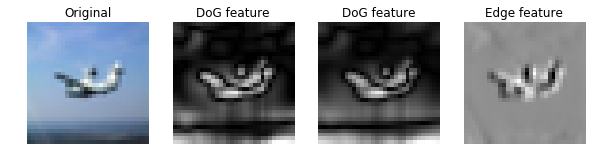

In [7]:
image = X_train[random.randint(0,49000)]
plt.subplot(1,4,1)
plt.imshow(image.astype("uint8"))
plt.axis("off")
plt.title("Original")
plt.subplot(1,4,2)
plt.imshow(dog_features(image,1,3).reshape(32,32).astype(np.float32))
plt.axis("off")
plt.title("DoG feature")
plt.subplot(1,4,3)
plt.imshow(dog_features(image,1,5).reshape(32,32).astype(np.float32))
plt.axis("off")
plt.title("DoG feature")
plt.subplot(1,4,4)
plt.imshow(edge_features(image.astype("uint8")).reshape(32,32))
plt.axis("off")
plt.title("Edge feature")

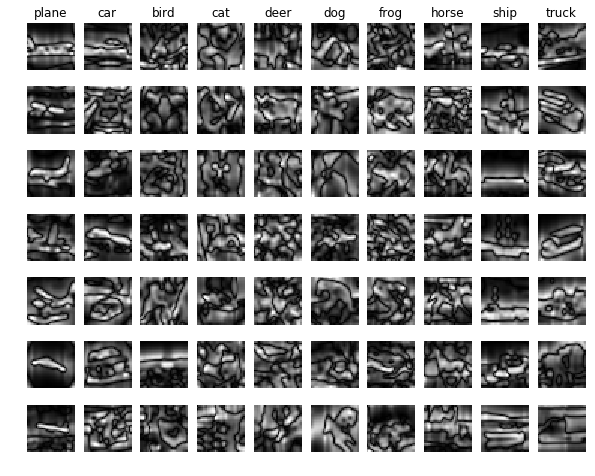

In [8]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(dog_features(X_train[idx],1,5).reshape(32,32).astype(np.float32))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

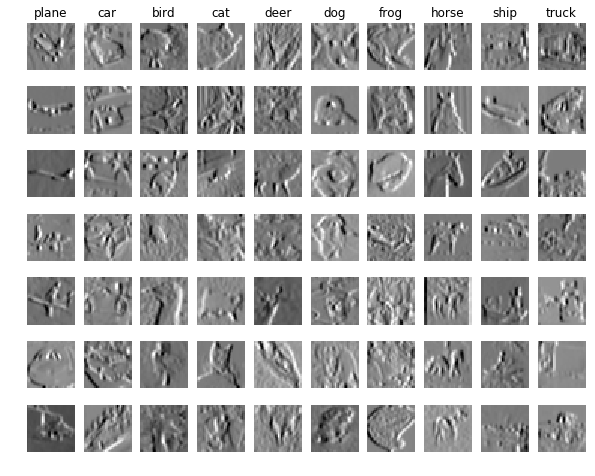

In [9]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(edge_features(X_train[idx]).reshape(32,32).astype(np.float32))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [10]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature,
               lambda img: color_histogram_hsv(img, nbin=num_color_bins),
               lambda img: dog_features(img)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
print(X_train.shape, X_train_feats.shape)

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

lr 1.000000e-04 reg 1.000000e-03 train accuracy: 0.500408 val accuracy: 0.509000
lr 1.000000e-04 reg 2.500750e+00 train accuracy: 0.459490 val accuracy: 0.472000
lr 1.000000e-04 reg 5.000500e+00 train accuracy: 0.425102 val accuracy: 0.435000
lr 1.000000e-04 reg 7.500250e+00 train accuracy: 0.400857 val accuracy: 0.422000
lr 1.000000e-04 reg 1.000000e+01 train accuracy: 0.382204 val accuracy: 0.394000
lr 2.575000e-03 reg 1.000000e-03 train accuracy: 0.548980 val accuracy: 0.519000
lr 2.575000e-03 reg 2.500750e+00 train accuracy: 0.442184 val accuracy: 0.444000
lr 2.575000e-03 reg 5.000500e+00 train accuracy: 0.410388 val accuracy: 0.422000
lr 2.575000e-03 reg 7.500250e+00 train accuracy: 0.377245 val accuracy: 0.377000
lr 2.575000e-03 reg 1.000000e+01 train accuracy: 0.366306 val accuracy: 0.395000
lr 5.050000e-03 reg 1.000000e-03 train accuracy: 0.548592 val accuracy: 0.515000
lr 5.050000e-03 reg 2.500750e+00 train accuracy: 0.428531 val accuracy: 0.431000
lr 5.050000e-03 reg 5.000500

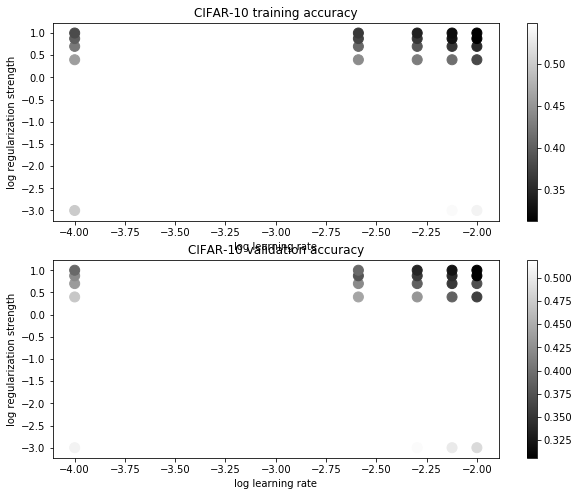

In [13]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-4, 1e-2]
regularization_strengths = [1e-3, 1e1]

results = {}
best_val = -1
best_svm = None

range_lr = np.linspace(learning_rates[0],learning_rates[1],5)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],5)
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

for valid_lr in range_lr:
    for valid_reg in range_reg:
        
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, valid_lr, valid_reg, num_iters=4000)
        train_predict = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == train_predict)
        
        val_predict = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == val_predict)
        
        results[(valid_lr,valid_reg)] = (train_accuracy,val_accuracy)

        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

## DoG

In [11]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

input_dim = X_train_feats.shape[1]
hidden_dim = 512
num_classes = 10

# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
results = {}
best_val_acc = -1
# hidden_size = [75, 150]
learning_rates = [1e-1, 1e0]
regularization_strengths = [1e-4, 1e-2]

range_lr = np.linspace(learning_rates[0],learning_rates[1],5)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],5)
# range_hs = np.linspace(hidden_size[0],hidden_size[1],4, dtype = int)

rate = 0
# for hs in range_hs:
    
for lr in range_lr:
    tic = time.time()
    for reg in range_reg:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=2500, batch_size=400, learning_rate=lr, 
        learning_rate_decay=0.95, reg = reg)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc
    rate += 0.2
    toc = time.time()
    print(rate,"% done", toc-tic, "seconds costed")

for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print( "lr {} reg {} val accuracy:{}".format(lr, reg, val_acc) )
    
print("Best validation accuracy:{}".format(best_val_acc))
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
import math
marker_size = 100

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

colors = [results[x] for x in results] # default size of markers is 20
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

0.2 % done 278.48257660865784 seconds costed
0.4 % done 283.50189876556396 seconds costed
0.6000000000000001 % done 382.57864451408386 seconds costed
0.8 % done 222.01038265228271 seconds costed


/home/xiezhq/deep-learning/assignment1_copy/cs231n/classifiers/neural_net.py:100: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(np.choose(y, score_exp.T) / score_exp_sum.T))


1.0 % done 333.2548017501831 seconds costed
lr 0.1 reg 0.0001 val accuracy:0.575
lr 0.1 reg 0.002575 val accuracy:0.564
lr 0.1 reg 0.005050000000000001 val accuracy:0.552
lr 0.1 reg 0.007525000000000001 val accuracy:0.56
lr 0.1 reg 0.01 val accuracy:0.545
lr 0.325 reg 0.0001 val accuracy:0.549
lr 0.325 reg 0.002575 val accuracy:0.551
lr 0.325 reg 0.005050000000000001 val accuracy:0.565
lr 0.325 reg 0.007525000000000001 val accuracy:0.539
lr 0.325 reg 0.01 val accuracy:0.543
lr 0.55 reg 0.0001 val accuracy:0.552
lr 0.55 reg 0.002575 val accuracy:0.561
lr 0.55 reg 0.005050000000000001 val accuracy:0.53
lr 0.55 reg 0.007525000000000001 val accuracy:0.543
lr 0.55 reg 0.01 val accuracy:0.513
lr 0.775 reg 0.0001 val accuracy:0.561
lr 0.775 reg 0.002575 val accuracy:0.513
lr 0.775 reg 0.005050000000000001 val accuracy:0.544
lr 0.775 reg 0.007525000000000001 val accuracy:0.512
lr 0.775 reg 0.01 val accuracy:0.492
lr 1.0 reg 0.0001 val accuracy:0.44
lr 1.0 reg 0.002575 val accuracy:0.516
lr 1.0

NameError: name 'marker_size' is not defined

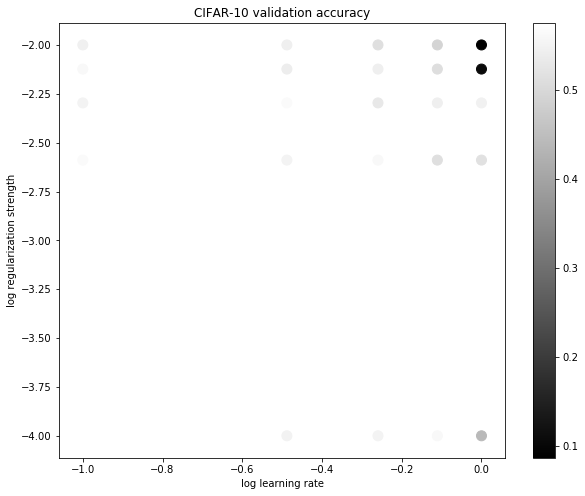

In [13]:
##It takes too much time to run once again, I pick the snippet out to plot.

import math
marker_size = 100

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

colors = [results[x] for x in results] # default size of markers is 20
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

## Edge

In [14]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature,
               lambda img: color_histogram_hsv(img, nbin=num_color_bins),
               lambda img: edge_features(img)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
print(X_train.shape, X_train_feats.shape)


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

0.2 % done 228.76890516281128 seconds costed
0.4 % done 227.82815170288086 seconds costed
0.6000000000000001 % done 264.8196928501129 seconds costed
0.8 % done 271.9212908744812 seconds costed


/home/xiezhq/deep-learning/assignment1_copy/cs231n/classifiers/neural_net.py:100: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(np.choose(y, score_exp.T) / score_exp_sum.T))


1.0 % done 279.7990744113922 seconds costed
lr 0.1 reg 0.0 val accuracy:0.574
lr 0.1 reg 0.0005 val accuracy:0.581
lr 0.1 reg 0.001 val accuracy:0.573
lr 0.1 reg 0.0015 val accuracy:0.592
lr 0.1 reg 0.002 val accuracy:0.575
lr 0.575 reg 0.0 val accuracy:0.567
lr 0.575 reg 0.0005 val accuracy:0.581
lr 0.575 reg 0.001 val accuracy:0.574
lr 0.575 reg 0.0015 val accuracy:0.582
lr 0.575 reg 0.002 val accuracy:0.567
lr 1.05 reg 0.0 val accuracy:0.569
lr 1.05 reg 0.0005 val accuracy:0.581
lr 1.05 reg 0.001 val accuracy:0.581
lr 1.05 reg 0.0015 val accuracy:0.58
lr 1.05 reg 0.002 val accuracy:0.58
lr 1.525 reg 0.0 val accuracy:0.557
lr 1.525 reg 0.0005 val accuracy:0.54
lr 1.525 reg 0.001 val accuracy:0.555
lr 1.525 reg 0.0015 val accuracy:0.565
lr 1.525 reg 0.002 val accuracy:0.554
lr 2.0 reg 0.0 val accuracy:0.521
lr 2.0 reg 0.0005 val accuracy:0.122
lr 2.0 reg 0.001 val accuracy:0.102
lr 2.0 reg 0.0015 val accuracy:0.538
lr 2.0 reg 0.002 val accuracy:0.087
Best validation accuracy:0.592


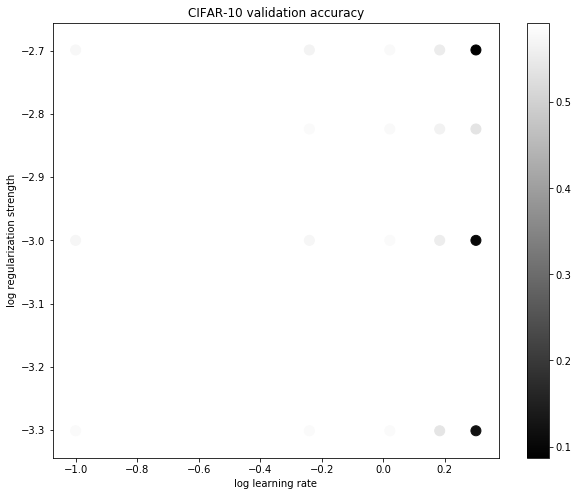

In [18]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

input_dim = X_train_feats.shape[1]
hidden_dim = 512
num_classes = 10

# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net_edge = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
results = {}
best_val_acc = -1
# hidden_size = [75, 150]
learning_rates = [1e-1, 2e0]
regularization_strengths = [0, 2e-3]

range_lr = np.linspace(learning_rates[0],learning_rates[1],5)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],5)
# range_hs = np.linspace(hidden_size[0],hidden_size[1],4, dtype = int)

rate = 0
# for hs in range_hs:
    
for lr in range_lr:
    tic = time.time()
    for reg in range_reg:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=2500, batch_size=400, learning_rate=lr, 
        learning_rate_decay=0.95, reg = reg)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_net_edge = net         
        results[(lr,reg)] = val_acc
    rate += 0.2
    toc = time.time()
    print(rate,"% done", toc-tic, "seconds costed")

for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print( "lr {} reg {} val accuracy:{}".format(lr, reg, val_acc) )
    
print("Best validation accuracy:{}".format(best_val_acc))
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

import math
marker_size = 100

x_scatter = [math.log10(x[0]) for x in results if x[0] != 0 and x[1] != 0]
y_scatter = [math.log10(x[1]) for x in results if x[0] != 0 and x[1] != 0]


colors = [results[x] for x in results if x[0] != 0 and x[1] != 0] # default size of markers is 20
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

### Conclusion
I have tuned both edge features and DoG features. You could see from the log that the accuracy is higher than the previous result with only two features (especially for SVM).


|        |SVM|Neural|
|--------|---|------|
|Original|48%|  57% |
|New     |52%|  59% |

Here are some more combinations could be taken into trying, and my parameters are not tuned very well due to the computing capacity constrain of my laptop.

But we could easily see the average performance is better than just two parameters (I tuned the two layers of FC network very carefully, which lead the great performance)

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

### Confusion Matrix
So far we have tuned many parameters to improve accuracy. I noticed that some classes are easy to be confused with each others. For example, a truck is easy to be classified as a car, dog is easily to be classified as cat.
So it'll be helpful if that we have method to visualize it for us to develop specific methods for these classes.

`confusion_matrix` works well for it. I'll show how it helps us to find out this kind of information.

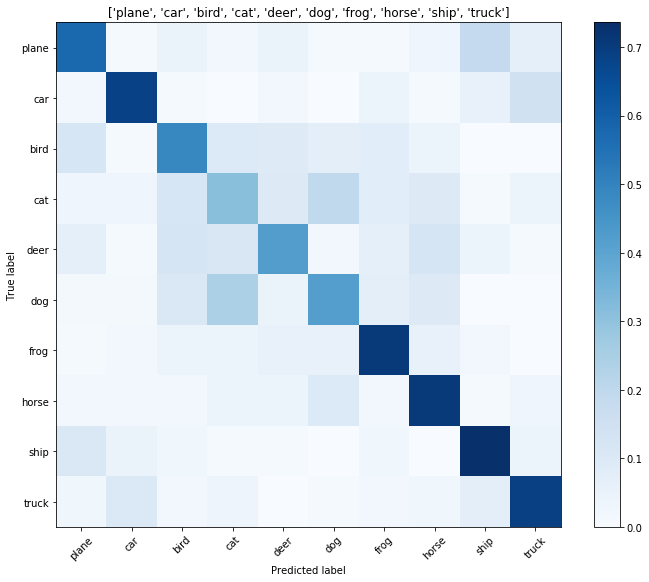

In [19]:
from sklearn.metrics import confusion_matrix

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_test_pred = best_net_edge.predict(X_test_feats)
cm = confusion_matrix(y_test, y_test_pred)
cm_n = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plt.imshow(cm_n, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(classes)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

We can see the strong colors off the diagonal line, which suggests that these classes bring much more misclassification than others. We ought to take action to develop specific methods to distinguish them for significant overall accuracy improvement.